# DataHack 2022

In this notebook, we provide a bit of starter code to help contestants begin to work with the data.

## Load Data

We highly recommend using pandas to manipulate the `.csv` files provided. 

In [95]:
!pip install pandas plotly sktime transformers

In [96]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
from transformers import pipeline

Use the `thousands` kwarg to designate that numbers have commas seperating them every 3 orders of magnitude. If you do not use this kwarg, the numbers will be read in as strings

In [97]:
country_df = pd.read_csv("./data/country-data.csv", thousands=r",")
daily_user_df = pd.read_csv("./data/daily-user-info.csv", thousands=r",", index_col="Day Index")
archive_df = pd.read_csv("./data/upworthy-archive.csv", thousands=r",", parse_dates=["created_at", "updated_at"], low_memory=False)

### country_df

This data gives us data consisting of the consumption habits of various countires

In [80]:
country_df.head()

,Country,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration
0,United States,434944680,427058422,1202850944,59.86%,1.32,0:02:35
1,Canada,58957484,56514054,160809556,58.49%,1.31,0:02:53
2,United Kingdom,46435791,44456259,103884722,61.56%,1.35,0:02:25
3,Australia,23587951,22614120,58504210,61.07%,1.39,0:02:51
4,Germany,7542762,7057617,16473675,55.65%,1.38,0:03:13


We still need to convert the bouncerate into a proper number since the `%` symbol has made it convert to a string. Additionally, we should convert the session duration to a datetime-like object. 

In [81]:
country_df["Avg. Session Duration"] = pd.to_timedelta(country_df["Avg. Session Duration"])

In [82]:
country_df["Bounce Rate"] = country_df["Bounce Rate"].str.rstrip("%").astype("float") / 100

In [83]:
country_df

,Country,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration
0,United States,434944680,427058422,1202850944,0.5986,1.32,0 days 00:02:35
1,Canada,58957484,56514054,160809556,0.5849,1.31,0 days 00:02:53
2,United Kingdom,46435791,44456259,103884722,0.6156,1.35,0 days 00:02:25
3,Australia,23587951,22614120,58504210,0.6107,1.39,0 days 00:02:51
4,Germany,7542762,7057617,16473675,0.5565,1.38,0 days 00:03:13
...,...,...,...,...,...,...,...
201,Mauritania,3541,3541,7082,1.0000,1.00,0 days 00:00:00
202,Sierra Leone,3541,0,3541,1.0000,1.00,0 days 00:00:00
203,San Marino,3541,3541,3541,1.0000,1.00,0 days 00:00:00
204,S√£o Tom√© & Pr√≠ncipe,3541,3541,10624,0.6666,1.00,0 days 00:00:33


In [84]:
country_df.dtypes

Country                           object
Users                              int64
New Users                          int64
Sessions                           int64
Bounce Rate                      float64
Pages / Session                  float64
Avg. Session Duration    timedelta64[ns]
dtype: object

### daily_user_df

This set of data gives us daily data for users, sessions, and pageviews.

In [85]:
daily_user_df.index = pd.to_datetime(daily_user_df.index)

In [86]:
daily_user_df["Avg. Session Duration"] = pd.to_timedelta(daily_user_df["Avg. Session Duration"])

In [90]:
daily_user_df["Bounce Rate"] = daily_user_df["Bounce Rate"].str.rstrip("%").astype("float") / 100

In [101]:
daily_user_df

,Users,New Users,Number of Sessions per User,Sessions,Avg. Session Duration,Bounce Rate,Pageviews,Pages / Session
Day Index,,,,,,,,
1/1/13,67283,17706,1.05,68825.0,0:01:46,80.00%,82590,1.15
1/2/13,123942,53118,1.03,NaN,0:01:25,72.22%,182645,1.44
1/3/13,194766,88530,1.13,NaN,0:01:05,77.42%,286954,1.31
1/4/13,237261,123942,1.09,NaN,0:02:09,87.67%,331373,1.15
1/5/13,134566,60200,1.13,NaN,0:01:35,76.74%,194671,1.26
...,...,...,...,...,...,...,...,...
4/26/15,779065,371826,1.09,850679.0,0:00:41,90.42%,1026871,1.25
4/27/15,878218,322249,1.09,958046.0,0:01:27,84.44%,1227841,1.27
4/28/15,1327951,644499,1.07,1428810.0,0:00:54,88.34%,1720629,1.15


### archive_df

This dataset gives us the different experimental configurations and their results for a variety of clickability tests.

In [98]:
archive_df.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 11:33:26.475,2016-04-02 16:25:54.046,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",<p>Iff you start with the basic fact that inno...,let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,3118,8,0.1,False,False,NaN,NaN,201446
1,2014-11-20 15:00:01.032,2016-04-02 16:25:54.128,546e01d626714c6c4400004e,Things that matter. Pass 'em on.,People Sent This Lesbian Questions And Her Rai...,<p>I'll be honest. I've wondered about 7.</p>,people-sent-this-lesbian-questions-and-her-rai...,546d1b4bfd3617f091000041,4587,130,55.8,False,False,NaN,NaN,201446
2,2014-11-20 11:33:51.973,2016-04-02 16:25:54.069,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,$3 Million Is What It Takes For A State To Leg...,<p>Iff you start with the basic fact that inno...,3-million-is-what-it-takes-for-a-state-to-lega...,546dce659ad54ec65b000041,3017,19,26.9,False,False,NaN,NaN,201446
3,2014-11-20 11:34:12.107,2016-04-02 16:25:54.049,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,The Fact That Sometimes Innocent People Are Ex...,<p>Iff you start with the basic fact that inno...,the-fact-that-sometimes-innocent-people-are-ex...,546dce659ad54ec65b000041,2974,26,100.0,True,False,NaN,NaN,201446
4,2014-11-20 11:34:33.935,2016-04-02 16:25:54.072,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,Reason #351 To End The Death Penalty: It Costs...,<p>Iff you start with the basic fact that inno...,reason-351-to-end-the-death-penalty-it-costs-3...,546dce659ad54ec65b000041,3050,10,0.2,False,False,NaN,NaN,201446


In [99]:
archive_df.dtypes

created_at              datetime64[ns]
updated_at              datetime64[ns]
clickability_test_id            object
excerpt                         object
headline                        object
lede                            object
slug                            object
eyecatcher_id                   object
impressions                      int64
clicks                           int64
significance                   float64
first_place                       bool
winner                            bool
share_text                      object
square                          object
test_week                        int64
dtype: object

## Data Analysis

Here's some basic plots to give you an idea of how to create some basic plots and generate a few insights

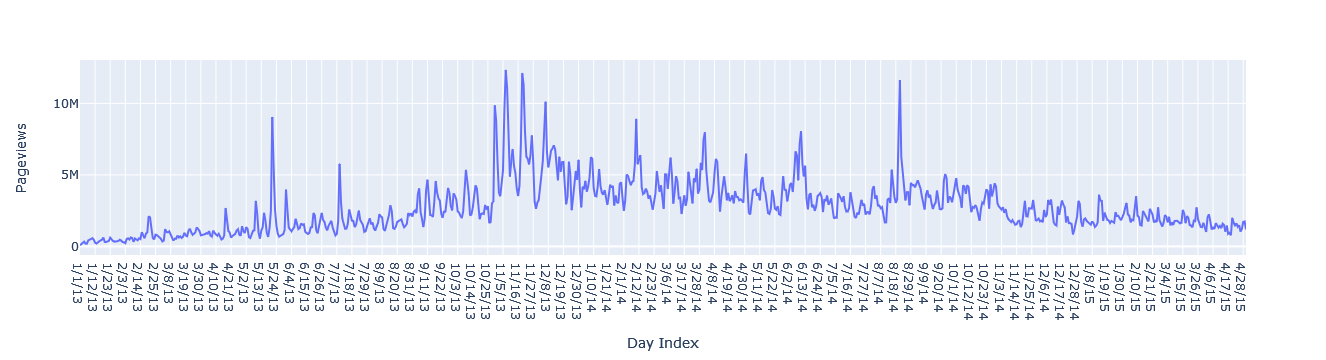

In [106]:
px.line(daily_user_df, x=daily_user_df.index, y="Pageviews")